<a href="https://colab.research.google.com/github/Avazjon-Isoboev/Data-Science-projects/blob/main/Aviachipta_narhini_bashorat_qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

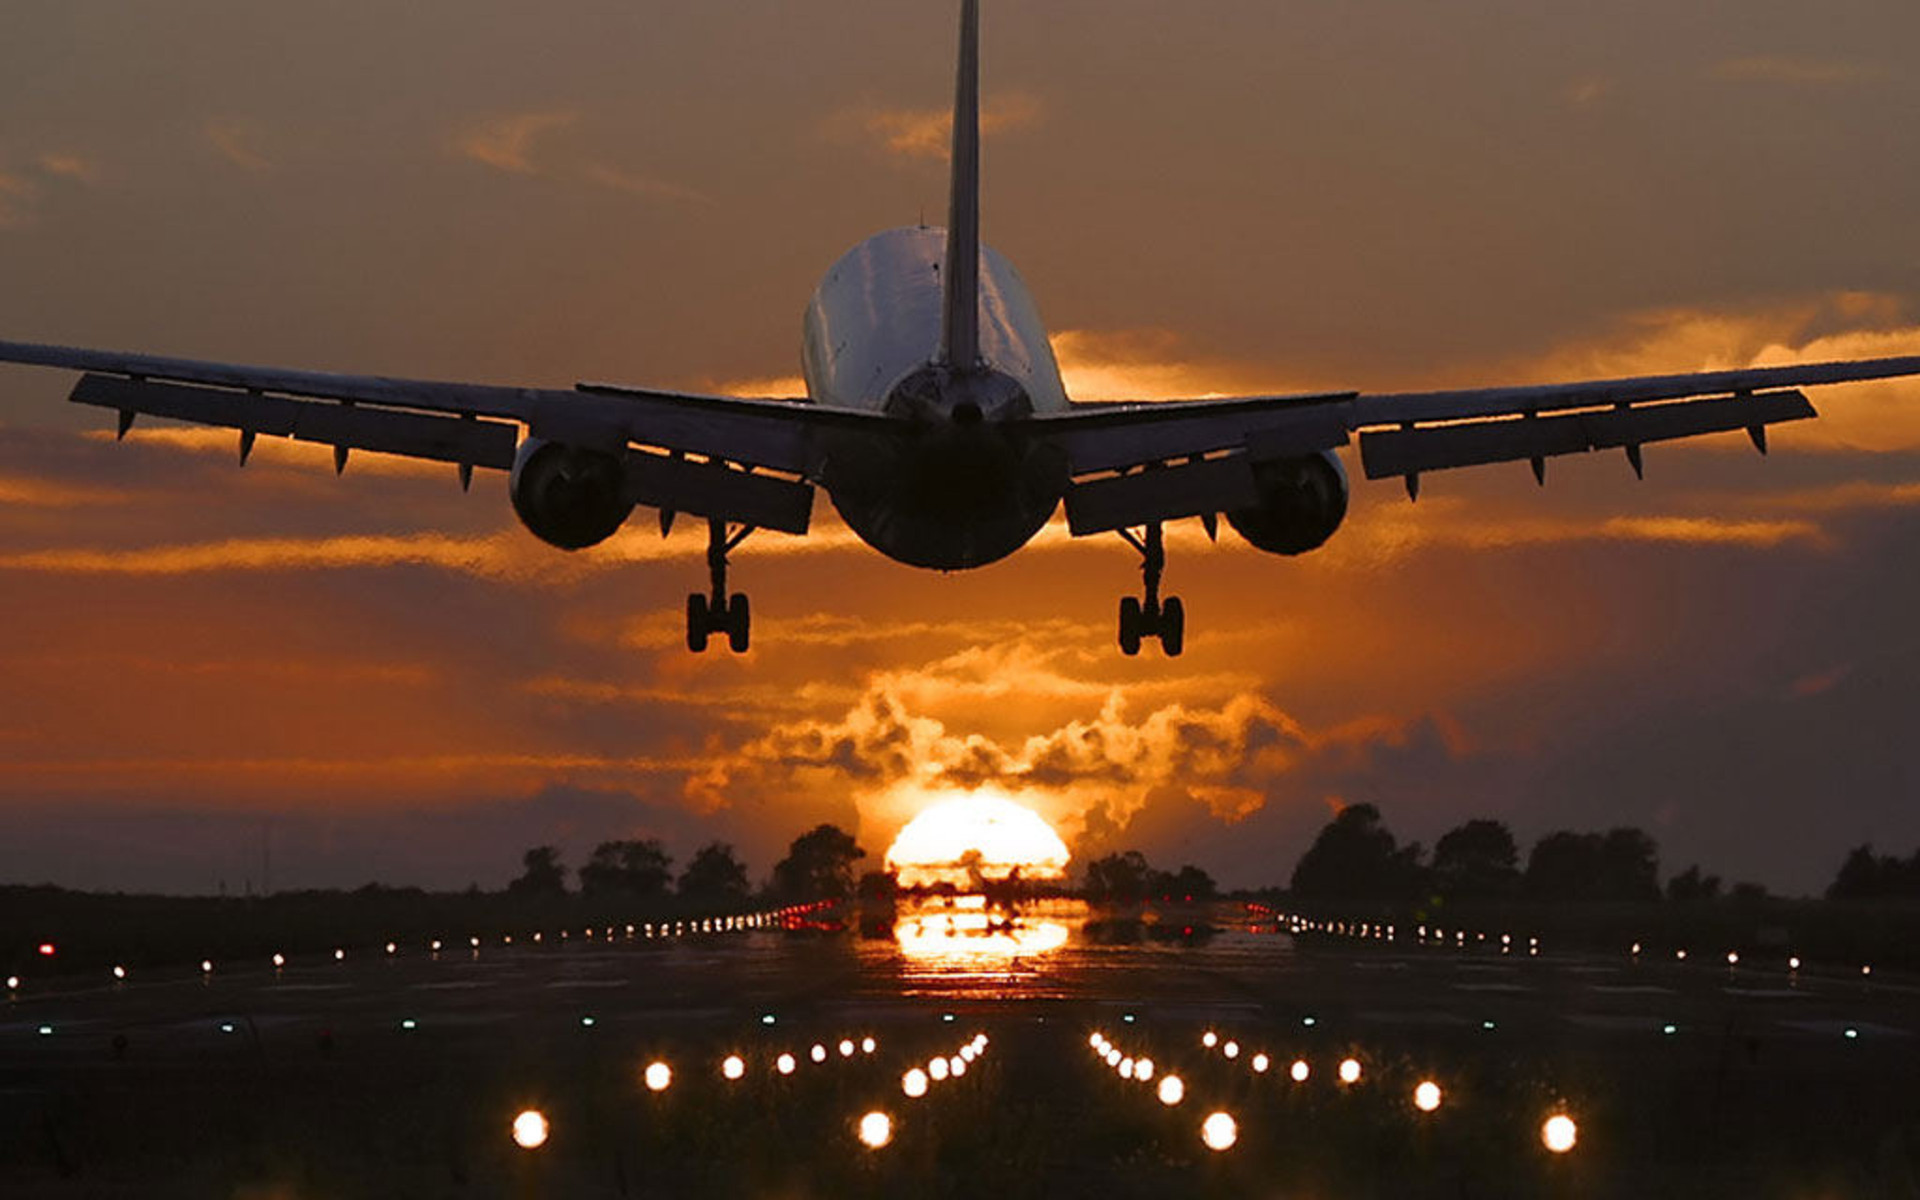

### Ushbu loyihada men "Kaggle" dan olingan ma'lumotlar to'plamini tahlil qilaman va undan mazmunli va manoli  ma'lumot olish uchun turli statistik  testlardan o'tkazaman.

##Tadqiqot savollari
Tadqiqotimizning maqsadi quyidagi tadqiqot savollariga javob berishdir:

1#Ekonom va biznes klassiga chiptalar narxi qanday farq qiladi?

2# Narx aviakompaniyalarga qarab farq qiladimi?

3# Chiptalar jo'nashdan 1 yoki 2 kun oldin sotib olinsa, narx qanday ta'sir qiladi?

4# Chipta narxi jo'nash va kelish vaqtiga qarab o'zgaradimi?

5# Manba va maqsad o'zgarishi bilan narx qanday o'zgaradi?

6#To'xtashlar soni narxga ta'sir qiladimi?

7# Narxga qaysi o'zgaruvchilar ko'proq ta'sir qiladi?

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
df = pd.read_csv('/content/train_data.csv')
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [58]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [60]:
df['airline'].value_counts()

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64

##Ekonom va biznes klasslari chiptalari narxi qanday farq qiladi?

Text(0.5, 1.0, 'Klass va kompaniya kura aviachipta narxlari')

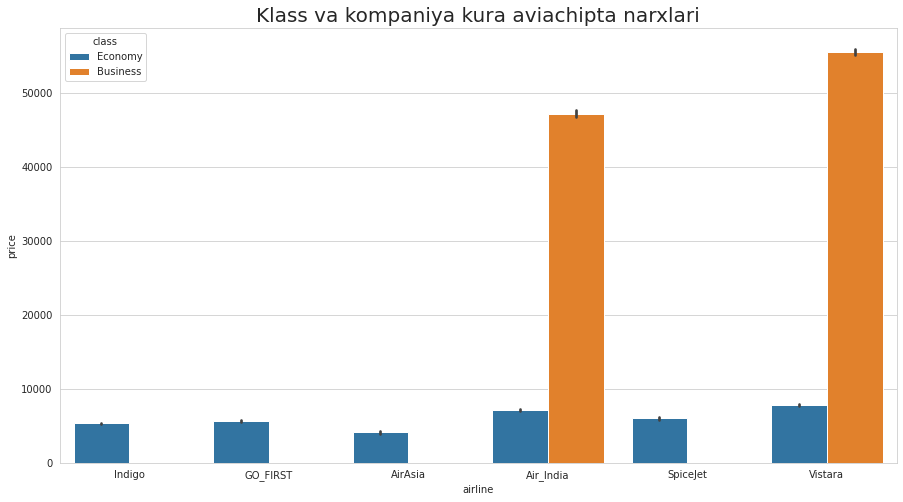

In [61]:
plt.figure(figsize=(15, 8))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Klass va kompaniya kura aviachipta narxlari',fontsize=20)

Biznes reyslari faqat ikkita kompaniyada mavjud: Air India va Vistara. Shuningdek, ikki toifadagi narxlar o‘rtasida katta tafovut mavjud bo‘lib, bu biznes uchun iqtisod chiptalari narxidan deyarli 5 baravar qimmatroq.

# **Narx aviakompaniyalarga qarab farq qiladimi?**

Kompaniyalar o'rtasidagi narxlarni solishtirish uchun biz faqat bir xil turdagi chiptalarni solishtiramiz, chunki oldingi savol klass yakuniy narxga katta ta'sir ko'rsatishini ko'rsatdi.

Text(0.5, 1.0, 'Biznes klass chipta narxlari')

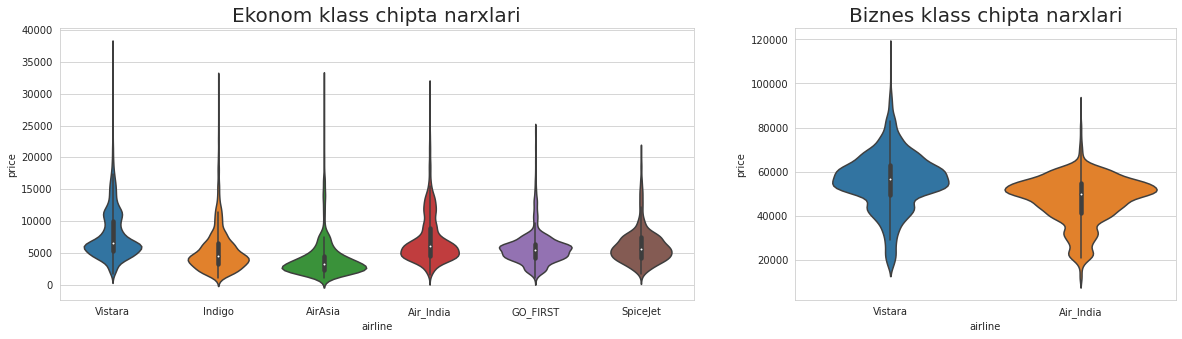

In [62]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(20, 5))
sns.violinplot(y = "price", x = "airline",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Ekonom klass chipta narxlari",fontsize=20)
sns.violinplot(y = "price", x = "airline",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Biznes klass chipta narxlari",fontsize=20)

Ushbu grafikda har bir kompaniya o'rtasida ozgina farqlar mavjud, AirAsia Air India va Vistara qimmatroq bo'lganda eng arzon reyslarga ega ko'rinadi. Biroq, Vistara biznes chiptalari Air Indianikiga qaraganda biroz qimmatroq.

# **Chiptalar jo'nashdan 1 yoki 2 kun oldin sotib olinsa, narx qanday ta'sir qiladi?**

Qolgan kunlar soniga qarab narxlar qanday o'zgarishini tasavvur qilish uchun - egri chiziqdagi naqshni tushunishga harakat qilish uchun qolgan kunlarga qarab o'rtacha narxni hisoblab chiqaman.

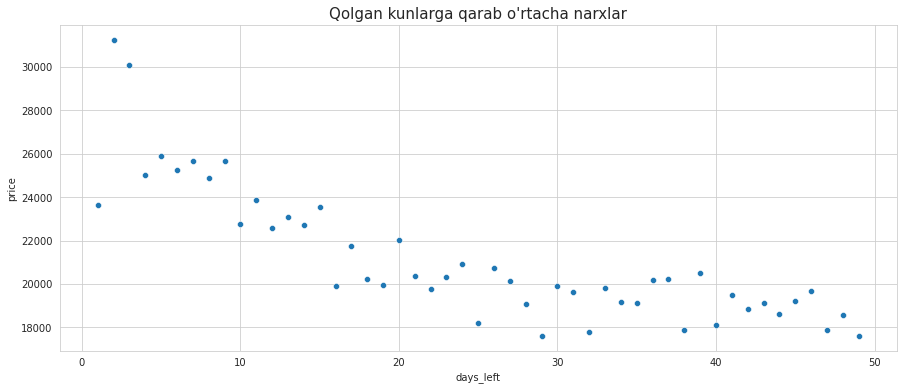

In [63]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Qolgan kunlarga qarab o'rtacha narxlar",fontsize=15)

# reyslar sonini tekshirish

In [64]:
df['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

Ushbu grafikda ikki xil egri chiziqni ko'rish mumkin, birinchisi, parvozdan 50-20 kun oldin barqaror va 20-2 kun oldin ijobiy monotonik egri.

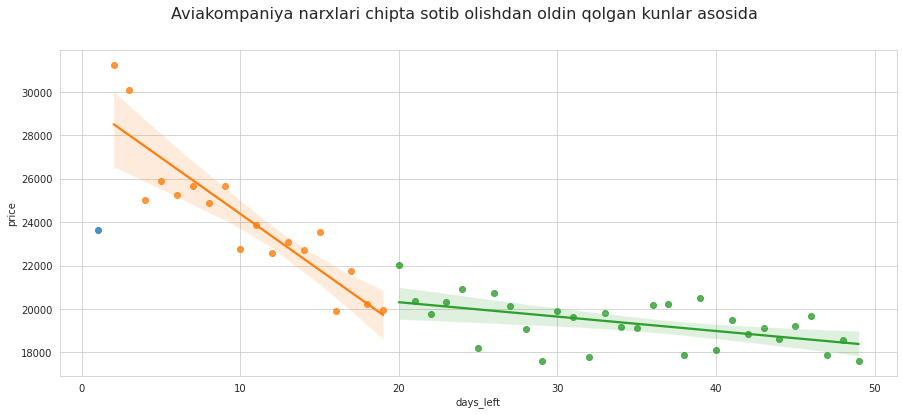

In [65]:
plt.figure(figsize=(15,6)).suptitle('Aviakompaniya narxlari chipta sotib olishdan oldin qolgan kunlar asosida', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

Grafikda narxlarning asta-sekin ko'tarilishi va parvozdan 20 kun oldin keskin ko'tarila boshlagani, lekin parvozdan atigi bir kun oldin tushishi uch baravar arzonroq ekanligi ko'rsatilgan. Buni kompaniyalar o'zlarining bo'sh o'rindiqlarini to'ldirishni istashlari va shu tariqa samolyotlar to'la bo'lishini ta'minlash uchun chiptalar narxini pasaytirishlari bilan izohlash mumkin.

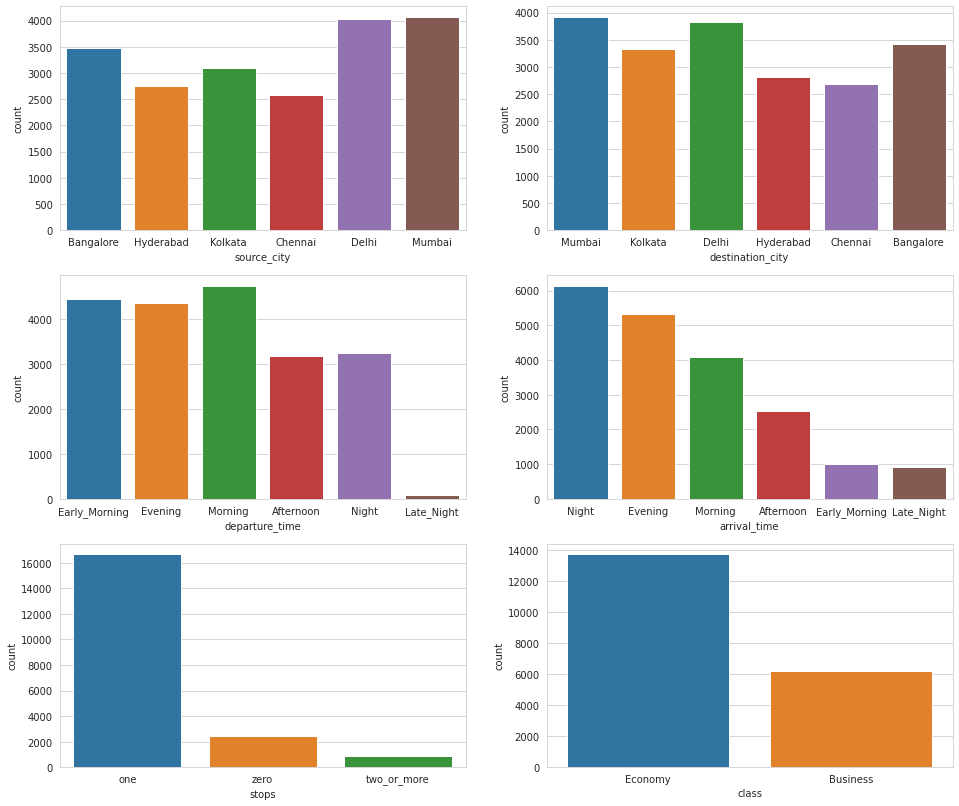

In [66]:
fig, ax = plt.subplots(3, 2, figsize=(16, 14))

sns.countplot(ax=ax[0, 0], data=df, x='source_city')
sns.countplot(ax=ax[0, 1], data=df, x='destination_city')
sns.countplot(ax=ax[1, 0], data=df, x='departure_time')
sns.countplot(ax=ax[1, 1], data=df, x='arrival_time')
sns.countplot(ax=ax[2, 0], data=df, x='stops')
sns.countplot(ax=ax[2, 1], data=df, x='class');

# Aviachipta narxini bashorat qilish
# Machine Learning qismi

kerakli kutubxonalarni yuklab olish

In [67]:
#scikit-learn 
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# xgboost

from xgboost import XGBRegressor

In [68]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=15)
for tr_idx, te_idx in strat_split.split(df, df['class']):
    st_trainset = df.loc[tr_idx]
    st_testset = df.loc[te_idx]

In [69]:
X_train = st_trainset.drop('price', axis=1)
y = st_trainset['price'].copy()

X_num = X_train[['duration', 'days_left']]

In [70]:
num_pipeline = Pipeline([
            ('std_scaler', StandardScaler())
])

In [71]:
num_attribs = list(X_num)
cat_attribs = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

full_pipeline = ColumnTransformer([
              ('num', num_pipeline, num_attribs),
              ('cat', OneHotEncoder(), cat_attribs)
])

In [72]:
X_prepared = full_pipeline.fit_transform(X_train)

# Linear Regression

In [73]:
LR_model = LinearRegression()

LR_model.fit(X_prepared, y)
X_test = st_testset.drop('price', axis=1)
y_test = st_testset['price'].copy()
X_test_prepared = full_pipeline.transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 4466.0
RMSE= 6597.0


#DecisionTree Regressor

In [74]:
DT_model = DecisionTreeRegressor()

DT_model.fit(X_prepared, y)
y_predicted = DT_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 2193.0
RMSE= 4925.0


#RandomForest Regressor

In [75]:
RF_model = RandomForestRegressor()

RF_model.fit(X_prepared, y)
y_predicted = RF_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 1940.0
RMSE= 3755.0


#XGBoost Regressor

In [76]:
XGB_model = XGBRegressor()

XGB_model.fit(X_prepared, y)
y_predicted = XGB_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

[04:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE= 2922.0
RMSE= 4883.0


# Taqdimot

In [78]:
df2 = pd.read_csv("/content/test_data.csv")
df2

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,4997,Indigo,6E-6214,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,4998,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,4999,Air_India,AI-673,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


In [79]:
for i in range(len(df2)):
    if df2['source_city'][i] == df2['destination_city'][i]:
        print('Xatolik bor!')

In [80]:
df2.drop(['id', 'flight'], axis=1, inplace=True)
df2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [81]:
df2.describe()


,duration,days_left
count,5000.000000,5000.000000
mean,12.328838,26.015600
std,7.306348,13.692409
min,0.830000,1.000000
25%,6.830000,14.000000
50%,11.250000,26.000000
75%,16.250000,38.000000
max,40.670000,49.000000


In [82]:
forsub = full_pipeline.transform(df2)

# Submission uchun RandomForest Regressorni tanladim
sub_predicted = RF_model.predict(forsub)
sub_predicted

array([51911.62, 55607.02, 23339.98, ..., 50287.4 , 48591.  , 66700.06])

In [84]:
ss = pd.read_csv("/content/sample_solution.csv")
ss.head(10)

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [85]:
ss['price'] = sub_predicted

ss.to_csv("submission.csv", index=False)

In [86]:
pd.read_csv("./submission.csv")


,id,price
0,1,51911.62
1,2,55607.02
2,3,23339.98
3,4,2433.59
4,5,5779.64
...,...,...
4995,4996,58226.24
4996,4997,4473.98
4997,4998,50287.40
4998,4999,48591.00


#Muhim malumotlar


1. Biznes va iqtisodiyotda aviachiptalar o'rtasida katta farq bor. O'rtacha biznes chiptalari iqtisodiy chiptalardan 6,5 baravar qimmatroq.

2. Vistara va AirIndia eng qimmat kompaniyalar, AirAsia esa eng arzon ko'rinadi. Biroq, biznes chiptalari uchun faqat Vistara va AirIndia mavjud va Vistara biroz qimmatroq.

3. Umuman olganda, parvozdan 20 kun oldin narxlar juda sekin ko'tariladi, bu erda narxlar keskin ko'tariladi. Ammo parvozdan bir kun oldin, odatda, sotilmagan bo'sh o'rindiqlar mavjud. Shunday qilib, chiptalarni oldingi kundan uch barobar arzonroq topish mumkin.

4. Parvoz qancha uzoq bo'lsa, chiptalar 20 soatga yetguncha qimmatroq bo'ladi, keyin narxlar pasayadi.

5. Parvoz vaqti uchun:

Ko'rinib turibdiki, tushdan keyin va kechqurun jo'nash arzonroq, kechasi esa qimmatroq.
Erta tongda, kunduzi va kechqurun jo'nab ketish arzonroq, kechqurun esa qimmatroq.

6. Sayohat shaharlari uchun:

Dehlidan parvozlar eng arzon, boshqa shaharlardan o'rtacha hisobda teng, ammo Chenai uchun biroz qimmatroq.
Dehliga parvoz eng arzon, Bengalorga esa eng qimmat.
7. Umuman olganda, qancha to'xtash joyi bo'lsa, aviachipta shuncha qimmat bo'ladi.